In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [38]:
def trunc_state(array, state):
    return [array[i] for i in range(state)] + [0 for i in range(state, len(array))]

def generate_plot(state, pull):
    N = 6
    high =   [20, 20, 50, 0,  35, 27]
    medium = [25, 10, 10, 0,  20, 25]
    low =    [35, 50, 20, 0,  25, 28]
    pulled = [40, 30, 50, 0,  40, 40]
    budget = [40, 40, 40, 40, 40, 40, 40]

    high   = trunc_state(high,   state)
    medium = trunc_state(medium, state)
    low    = trunc_state(low,    state)
    pulled = trunc_state(pulled, (state if pull else state - 1))

    ind = 0.5 + np.arange(N)
    width = 0.35
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])

    ax.bar(ind, high, width, color='#fa1e0e', label="High-priority Category")
    ax.bar(ind, medium, width, bottom=high, color='#54e346', label="Medium-priority Category")
    ax.bar(ind, low, width, bottom= 80 - np.array(low), color='#f9f871', label="Low-priority Category")

    ax.bar(ind, pulled, width, color='black', fill=False, hatch="//", label=r'Pulled arms')


    ax.plot(budget, color='#111d5e', label=r'Budget: $\alpha_t N$')
    ax.set_ylabel('Number of arms')
    ax.set_xticks(ind)
    ax.set_xticklabels(('t=0', 't=1', 't=2', '...', 't=T-1', 't=T'))
    ax.set_yticks([0, 80])
    ax.set_yticklabels(('0', 'N'))
    ax.legend(loc=(1, 0.72))
    fig.show()
    fig.savefig((f'cat_p_{state}' if pull else f'cat_s_{state}') + '.png', bbox_inches = "tight")

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:36: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


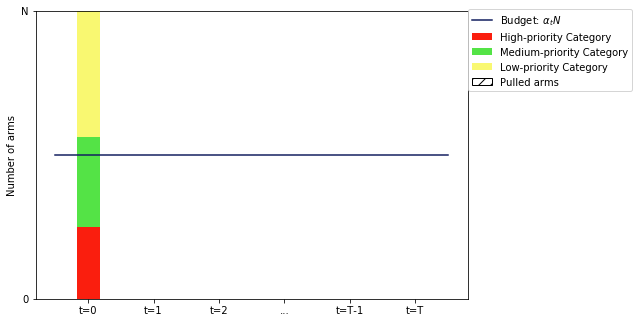

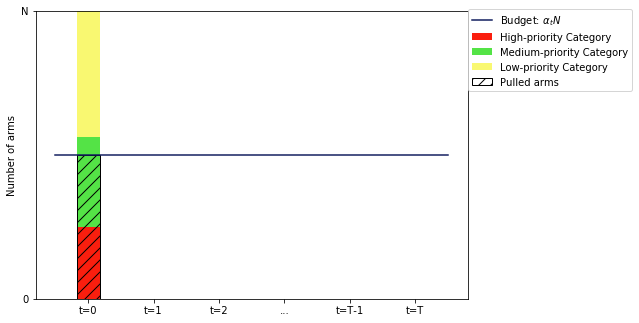

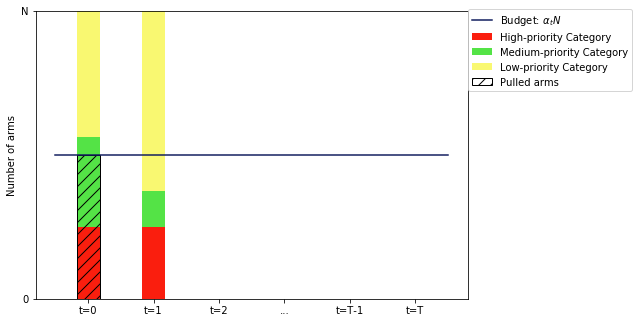

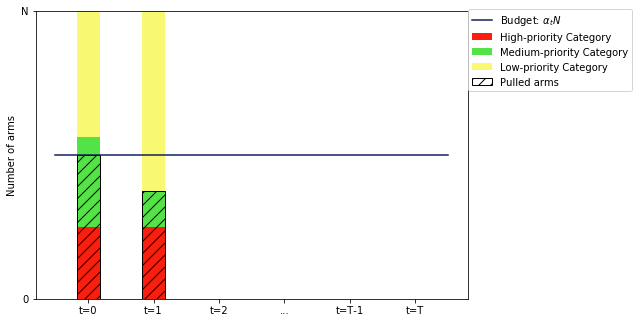

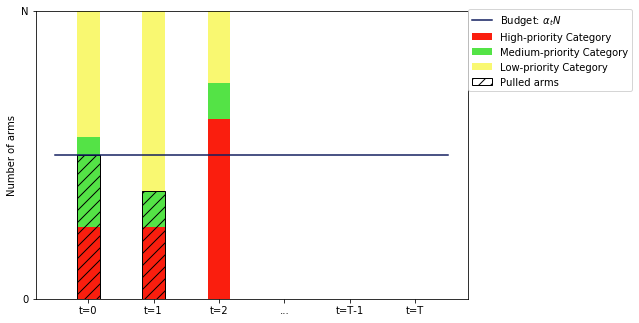

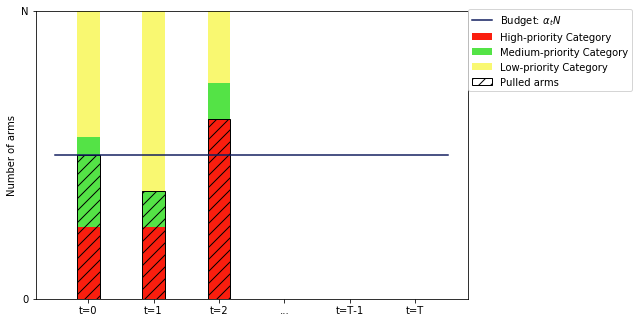

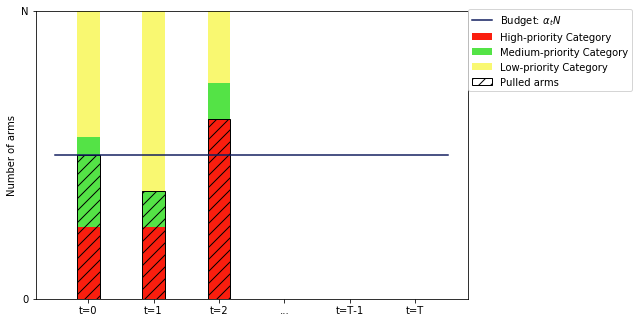

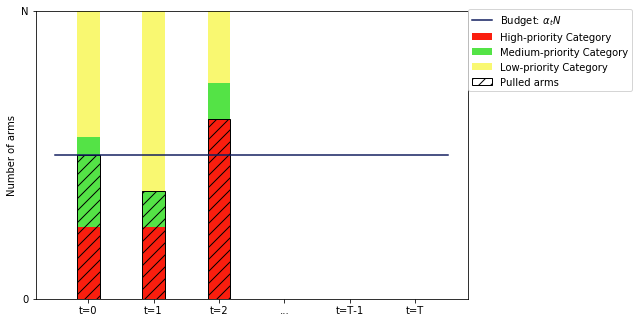

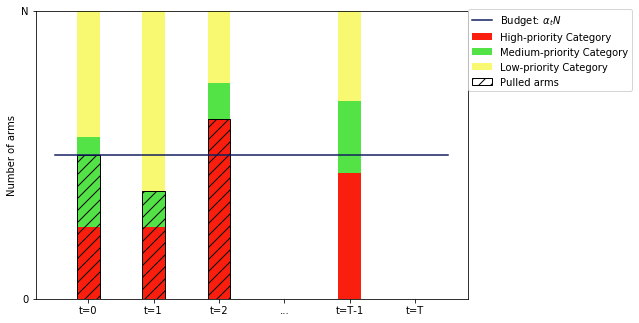

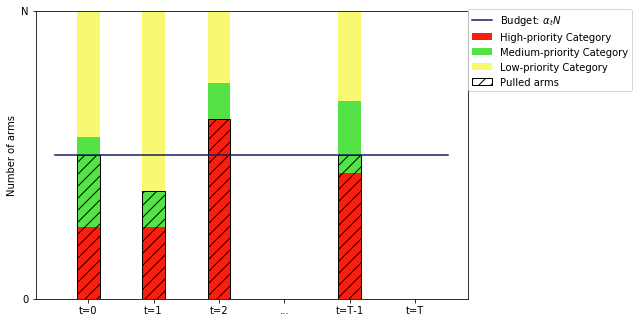

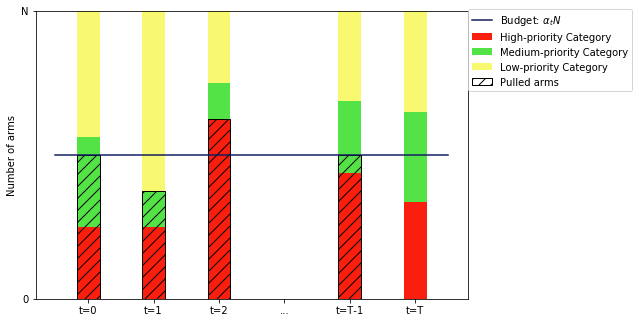

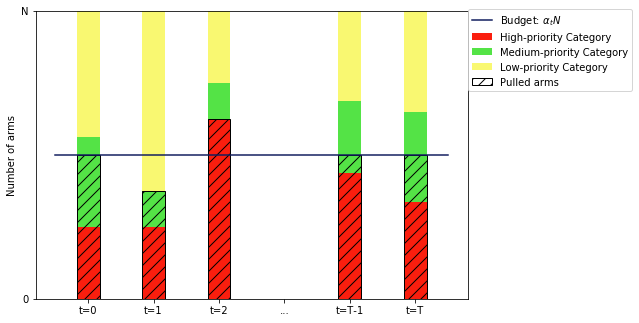

In [39]:
for state in range(1, 7):
    for pull in [False, True]:
        generate_plot(state, pull)